# Tokenizer

### BPE

BPE词表创建过程：
1. 初始化：在每个单词的末尾添加后缀`</w>`表明该子词位于末尾（主要方便解码）
2. 将每个单词拆分为单个字符序列，并统计每个字符的频数
3. 合并字符对：挑出频数最高的符号对，如t和h组成th，将新字符加入词表，然后将语料中所有该字符对融合
4. 重复迭代：重复2、3步骤直到达到预定的子词数量或下一个最高频数为1

In [31]:
import re, collections


def get_vocab(filename):
    """Divide words into chars and add end-of-word markers, and count freq to build vocab."""
    vocab = collections.defaultdict(int)
    with open(filename, "r", encoding="utf-8") as fhand:
        for line in fhand:
            words = line.strip().split()
            for word in words:
                vocab[" ".join(list(word)) + " </w>"] += 1
    return vocab


def get_stats(vocab):
    """Combine two chars and count the freq"""
    pairs = collections.defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += freq
    return pairs


def merge_vocab(pair, v_in):
    """merge vocab for new pair of character"""
    v_out = {}
    # escape special tokens like </w>
    bigram = re.escape(" ".join(pair))
    # Compile regular expression pattern make sure biagram is a complete word
    p = re.compile(r"(?<!\S)" + bigram + r"(?!\S)")  # `?<!\S to fit blank in head ?!\S fit the end`
    for word in v_in:
        # use new pair to replace single character
        w_out = p.sub("".join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out


def get_tokens(vocab):
    """Count the frequency of each token in the vocab"""
    tokens = collections.defaultdict(int)
    for word, freq in vocab.items():
        word_tokens = word.split()
        for token in word_tokens:
            tokens[token] += freq
    return tokens

In [32]:
vocab = get_vocab('test.txt')
print(vocab)

defaultdict(<class 'int'>, {'F l o y d H u b </w>': 1, 'i s </w>': 1, 't h e </w>': 2, 'f a s t e s t </w>': 1, 'w a y </w>': 1, 't o </w>': 1, 'b u i l d , </w>': 1, 't r a i n </w>': 1, 'a n d </w>': 1, 'd e p l o y </w>': 1, 'd e e p </w>': 3, 'l e a r n i n g </w>': 3, 'm o d e l s . </w>': 2, 'B u i l d </w>': 1, 'm o d e l s </w>': 1, 'i n </w>': 1, 'c l o u d . </w>': 1, 'T r a i n </w>': 1})


In [33]:
pairs = get_stats(vocab)
print(pairs)

defaultdict(<class 'int'>, {('F', 'l'): 1, ('l', 'o'): 3, ('o', 'y'): 2, ('y', 'd'): 1, ('d', 'H'): 1, ('H', 'u'): 1, ('u', 'b'): 1, ('b', '</w>'): 1, ('i', 's'): 1, ('s', '</w>'): 2, ('t', 'h'): 2, ('h', 'e'): 2, ('e', '</w>'): 2, ('f', 'a'): 1, ('a', 's'): 1, ('s', 't'): 2, ('t', 'e'): 1, ('e', 's'): 1, ('t', '</w>'): 1, ('w', 'a'): 1, ('a', 'y'): 1, ('y', '</w>'): 2, ('t', 'o'): 1, ('o', '</w>'): 1, ('b', 'u'): 1, ('u', 'i'): 2, ('i', 'l'): 2, ('l', 'd'): 2, ('d', ','): 1, (',', '</w>'): 1, ('t', 'r'): 1, ('r', 'a'): 2, ('a', 'i'): 2, ('i', 'n'): 6, ('n', '</w>'): 3, ('a', 'n'): 1, ('n', 'd'): 1, ('d', '</w>'): 2, ('d', 'e'): 7, ('e', 'p'): 4, ('p', 'l'): 1, ('e', 'e'): 3, ('p', '</w>'): 3, ('l', 'e'): 3, ('e', 'a'): 3, ('a', 'r'): 3, ('r', 'n'): 3, ('n', 'i'): 3, ('n', 'g'): 3, ('g', '</w>'): 3, ('m', 'o'): 3, ('o', 'd'): 3, ('e', 'l'): 3, ('l', 's'): 3, ('s', '.'): 2, ('.', '</w>'): 3, ('B', 'u'): 1, ('c', 'l'): 1, ('o', 'u'): 1, ('u', 'd'): 1, ('d', '.'): 1, ('T', 'r'): 1})


In [34]:
num_merges = 5
for i in range(num_merges):
    pairs = get_stats(vocab)
    if pairs is None:
        break
    best = max(pairs, key=pairs.get) # max wil imple get func in all keys in the dict
    vocab = merge_vocab(best, vocab)
    print("Iter: {}".format(i))
    print("Best pair: {}".format(best))
    tokens = get_tokens(vocab)
    print("Tokens: {}".format(tokens))
    print('Number of tokens: {}'.format(len(tokens)))

Iter: 0
Best pair: ('d', 'e')
Tokens: defaultdict(<class 'int'>, {'F': 1, 'l': 11, 'o': 7, 'y': 3, 'd': 5, 'H': 1, 'u': 4, 'b': 2, '</w>': 24, 'i': 9, 's': 6, 't': 6, 'h': 2, 'e': 9, 'f': 1, 'a': 8, 'w': 1, ',': 1, 'r': 5, 'n': 10, 'de': 7, 'p': 4, 'g': 3, 'm': 3, '.': 3, 'B': 1, 'c': 1, 'T': 1})
Number of tokens: 28
Iter: 1
Best pair: ('i', 'n')
Tokens: defaultdict(<class 'int'>, {'F': 1, 'l': 11, 'o': 7, 'y': 3, 'd': 5, 'H': 1, 'u': 4, 'b': 2, '</w>': 24, 'i': 3, 's': 6, 't': 6, 'h': 2, 'e': 9, 'f': 1, 'a': 8, 'w': 1, ',': 1, 'r': 5, 'in': 6, 'n': 4, 'de': 7, 'p': 4, 'g': 3, 'm': 3, '.': 3, 'B': 1, 'c': 1, 'T': 1})
Number of tokens: 29
Iter: 2
Best pair: ('l', 'o')
Tokens: defaultdict(<class 'int'>, {'F': 1, 'lo': 3, 'y': 3, 'd': 5, 'H': 1, 'u': 4, 'b': 2, '</w>': 24, 'i': 3, 's': 6, 't': 6, 'h': 2, 'e': 9, 'f': 1, 'a': 8, 'w': 1, 'o': 4, 'l': 8, ',': 1, 'r': 5, 'in': 6, 'n': 4, 'de': 7, 'p': 4, 'g': 3, 'm': 3, '.': 3, 'B': 1, 'c': 1, 'T': 1})
Number of tokens: 30
Iter: 3
Best pair: 

### WordPiece

WordPiece和BPE最大的不同处在于不会直接合并频率最高的字符对，而是计算出能够最大化给定文本序列概率的合并方式（最大似然）

将pair的freq除以组成该pair的两个single letter的freq，以找到那些真正具有潜在合并价值的字符对，而不是仅仅因为单个字符频繁出现而误认为字符对也很重要。

In [35]:
from collections import defaultdict


word_freqs: dict
def compute_pair_scores(splits):
    """Count pairs and single letter freqs in words."""
    letter_freqs = defaultdict(int)
    pair_freqs = defaultdict(int)
    for word, freq in word_freqs.items():
        split = splits[word]
        if len(split) == 1:
            letter_freqs[split[0]] += freq
            continue
        for i in range(len(split) - 1):
            pair = (split[i], split[i + 1])
            letter_freqs[split[i]] += freq
            pair_freqs[pair] += freq
        # add the end word
        letter_freqs[split[-1]] += freq

    scores = {
        pair: freq / (letter_freqs[pair[0]] * letter_freqs[pair[1]])
        for pair, freq in pair_freqs.items()
    }
    return scores

### Unigram

对于语料库
```python
("hug", 10), ("pug", 5), ("pun", 12), ("bun", 4), ("hugs", 5)
```
分为严格的子字符串,并统计频数
```python
("h", 15) ("u", 36) ("g", 20) ("hu", 15) ("ug", 20) ("p", 17) ("pu", 17) ("n", 16)
("un", 16) ("b", 4) ("bu", 4) ("s", 5) ("hug", 15) ("gs", 5) ("ugs", 5)
```
这样可以计算每个子词出现的概率，比如子词 "ug" 出现的概率是 20/210

将每个标记都认为是独立的，所以可以计算概率

P([p, u, g])=P(p)×P(u)×P(g)=5 * 36 * 20 /210 ^ 3 = 0.000389

P([p, u, g])=P(pu)×P(g)=5 * 20 /210 ^ 3 = 0.0022676

就可获取每个可能分割的概率：

```python
["p", "u", "g"] : 0.000389
["p", "ug"] : 0.0022676
["pu", "g"] : 0.0022676
```

所以, "pug" 将被标记为 ["p", "ug"] 或者 ["pu", "g"], 取决于首先遇到这些分割中的哪一个

### SentencePiece

In [6]:
import sentencepiece as spm


spm.SentencePieceTrainer.train(input="data/西游记.txt", model_prefix='m', vocab_size=50000, model_type='unigram')

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: data/西游记.txt
  input_format: 
  model_prefix: m
  model_type: UNIGRAM
  vocab_size: 50000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differentia

In [7]:
sp = spm.SentencePieceProcessor(model_file='m.model')
print(sp.encode(f'“我这头，原来是师父咒我的。”三藏道：“我念得是紧箍经，何曾咒你？”', out_type=int))
print(sp.encode(f'“我这头，原来是师父咒我的。”三藏道：“我念得是紧箍经，何曾咒你？”', out_type=str))
print(sp.decode([27, 45881, 3, 432, 27445, 19, 8, 38, 6, 35141, 9415, 13977, 110, 3, 7554, 18422, 10]))

[27, 45881, 3, 432, 27445, 19, 8, 38, 6, 35141, 9415, 13977, 110, 3, 7554, 18422, 10]
['▁“', '我这头', ',', '原来是', '师父咒我', '的', '。”', '三藏道', ':“', '我念', '得是', '紧箍', '经', ',', '何曾', '咒你', '?”']
“我这头,原来是师父咒我的。”三藏道:“我念得是紧箍经,何曾咒你?”


In [8]:
import jieba
import jieba.posseg

sent = "我这头，原来是师父咒我的。”三藏道：“我念得是紧箍经，何曾咒你？"
words = jieba.cut(sent)
print('/'.join(words))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/54/dqj88n2d345cnn8msy950gsm0000gn/T/jieba.cache


Loading model cost 0.389 seconds.
Prefix dict has been built successfully.


我/这头/，/原来/是/师父/咒/我/的/。/”/三藏/道/：/“/我念/得/是/紧箍经/，/何曾/咒/你/？


# Transformer

### Embedding Layer

#### Word Embedding
word embedding层是一个可以学习的向量，用于将one-hot这样高维且稀疏的向量转换到一个低维且密集的向量空间，在这过程中模型可以学习到token之间的语义信息，而不在把每个token视为独立的数字。

通过word embedding模型可以创建一个自己的语言理解，会把相似意思的token聚类到一起，比如不同语言但是相同意思的词会彼此相近，比如apple和苹果会聚在一起，且两者的距离会和car和汽车间的距离相近，也就是说模型学会了不同语言之间的联系和区别，并且也可以学习更深层的语义信息，比如king-man+woman约等于queen, 也就是说在embedding空间中的方向和距离有着特殊的意义。

总而言之，word embedding可将token转换为更表达语义和关系的低维向量，且有利于提升模型训练效率

#### Positional Embedding

一段语句的每个词的顺序是很关键的（调换一段话中词的位置会造成语义的不同），在传统的RNN这样的时序模型中模型天然可以学习到相对的位置信息，但是attention机制是直接对句子中的每一个token进行全局的计算的，不会考虑token在句子中的位置，也就是说如果两个token调换了位置，计算出来attention分数是一样的

要进行位置编码也容易，我们完全可以单纯的以对token序列+[1, 2, 3, ...]这样的处理，但是这样对于相对位置的获取有欠缺，训练起来也不够平滑

所以在transformer中采用了正余弦函数生成

假设序列长度为  L ，嵌入维度为  d ，第  pos  个位置的嵌入定义为：

$$
\text{PosEmb}{pos, 2i} = \sin\left(\frac{pos}{10000^{2i/d}}\right)
$$
$$
\text{PosEmb}{pos, 2i+1} = \cos\left(\frac{pos}{10000^{2i/d}}\right)
$$

In [9]:
import torch.nn as nn
import torch
import math

class PositionalEncoding(nn.Module): 
    def __init__(self, input_dim, max_len=1000): 
        super(PositionalEncoding, self).__init__() 
        pe = torch.zeros(max_len, input_dim).float()
        pe.requires_grad = False

        # position [max_len, 1]
        position = torch.arange(0, max_len).float().unsqueeze(1)

        # compute in log space
        div_term = (torch.arange(0, input_dim, 2).float() * -(math.log(10000.0) / input_dim)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer('pe', pe.unsqueeze(0)) # register pe as buffer zone to not be optimized

    def forward(self, X):
        # self.pe [1, max_len, input_dim]

        # X [batch_size, seq_len, embed_dim]
        # output [1, seq_len, input_dim]
        return X + self.pe[:, :X.size(1), :] 

In [10]:
batch_size = 2
seq_len = 10
embed_dim = 2
X = torch.randn(batch_size, seq_len, embed_dim)
pos_enc = PositionalEncoding(embed_dim, 20)
pe = pos_enc(X)
pe.shape

torch.Size([2, 10, 2])

#### RoPE: Rotary Position Embedding

LLaMA和一些其他最新的大型语言模型都使用了相对位置编码

考虑2维情况下

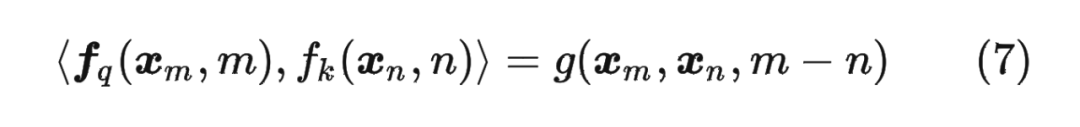

要实现相对的位置编码，主要就是在attention计算中要考虑两个token的相对位置距离

于是rope假设存在这么一个函数f以第m个元素的query或者key和位置m为参数

一个token的query通过f函数和另一个通过f函数token的key进行内积会形成一个以第m和第n个token值和两者的距离m-n为参数的函数

于是rope找到这样一个f

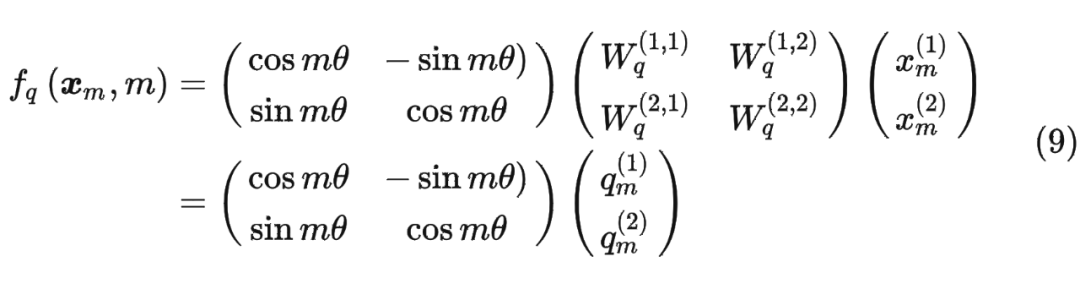

使得g可以表示为

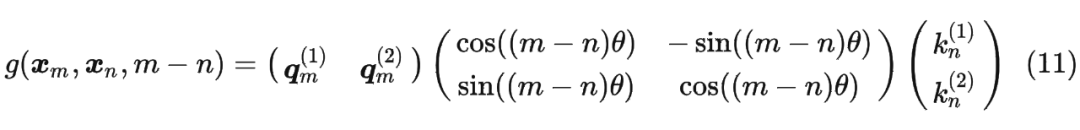

拓展到高维度，就可以得到包含相对位置信息的self-attention

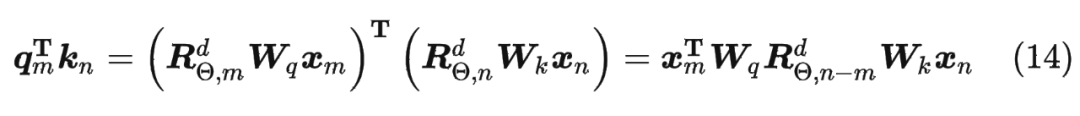

具体实现

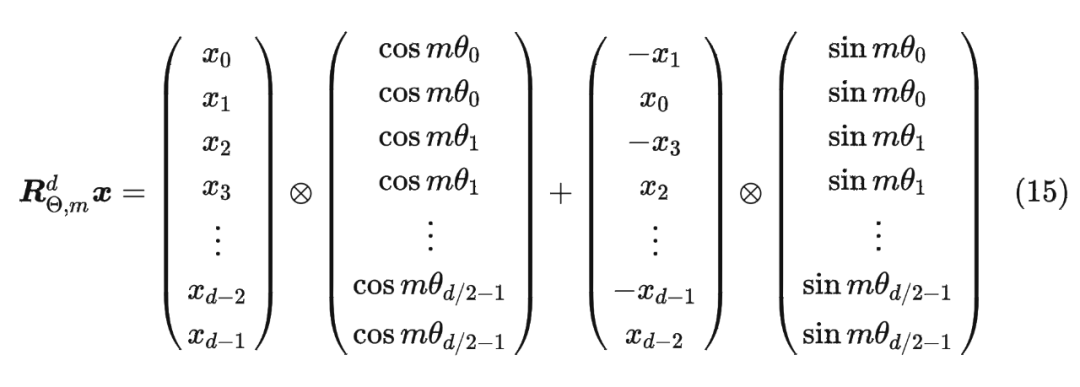

可以发现，RoPE以类似绝对编码的形式（只将输入通过一个函数f），实现了相对的位置编码

llama代码实现
```python
# 假设batch_size=2,seq_len=512,attention_head=12,attention_head_dim=64
# X: (2, 512, 12, 64)
# 提前创建旋转角度对应的tensor
def precompute_freqs_cis(dim: int, end: int, theta: float = 10000.0):
    # dim = attention_head_dim=64, end = 2*seq_len=1024
    freqs = 1.0 / (theta ** (torch.arange(0, dim, 2)[: (dim // 2)].float() / dim)) # freqs: (32,)
    t = torch.arange(end, device=freqs.device, dtype=torch.float32) # t: (1024,)
    # torch.outer: torch.outer(a, b) = a^T * b(外积)
    freqs = torch.outer(t, freqs) # freqs: (1024, 32)
    # torch.polar(abs, angle) = abs * cos(angle) + abs * sin(angle)j(在极坐标下构建复数张量)
    freqs_cis = torch.polar(torch.ones_like(freqs), freqs)  # complex64
    return freqs_cis # (1024, 64)

# 将freqs_cis变成和输入tensor相同的形状
def reshape_for_broadcast(freqs_cis: torch.Tensor, x: torch.Tensor):
    ndim = x.ndim
    assert 0 <= 1 < ndim
    assert freqs_cis.shape == (x.shape[1], x.shape[-1])
    shape = [d if i == 1 or i == ndim - 1 else 1 for i, d in enumerate(x.shape)]
    return freqs_cis.view(*shape)

# 将位置信息添加到原有的编码结果上
def apply_rotary_emb(
    xq: torch.Tensor,
    xk: torch.Tensor,
    freqs_cis: torch.Tensor,
) -> Tuple[torch.Tensor, torch.Tensor]:
    # torch.view_as_complex将一个tensor转换为复数，最后一个维度需要是2
    xq_ = torch.view_as_complex(xq.float().reshape(*xq.shape[:-1], -1, 2)) # (2, 512, 12, 32)
    xk_ = torch.view_as_complex(xk.float().reshape(*xk.shape[:-1], -1, 2)) # (2, 512, 12, 32)
    freqs_cis = reshape_for_broadcast(freqs_cis, xq_) # freqs_cis (1, 512, 1, 32)
    xq_out = torch.view_as_real(xq_ * freqs_cis).flatten(3) # (2, 512, 12, 64)
    xk_out = torch.view_as_real(xk_ * freqs_cis).flatten(3)
    return xq_out.type_as(xq), xk_out.type_as(xk)
```

### Attention

Embedding层只能提供一个词语一般上的语义信息，但是往往一个词语的信息是和完整的上下文有关系的，而训练好的attention层能计算出需要给初始的泛型嵌入加上一个什么向量，能把它移动到上下文对应的具体方向上

query（查询）的作用相当于提出一个问题，比如"a fluffy blue creature"这一句话中，当我们要更新creature对应的向量的时候，"creature"相当于提出一个问题"这句话中谁和我有关"，而query向量就是这个问题的答案
key（键）的作用就相当于答案，用于回答query的问题，所以当key和query越为相似（key和query在同一个向量维度），就说明这两个token的关系越大

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

所以在attention公式中，q和k会先进行相似度的计算（点积）（除以根号d_k以稳定数值），在通过softmax得到类似概率分布，也就是attention score，越大意味着两个token之间的联系越大

value（值）的作用就是告知在每一个句子中的其他token的影响下需要在embedding维度下 向哪一个方向移动，也就是说对于attention机制，就是将一个token在embedding空间的位置加上attention score * value向量，以改变其语义

而多头注意力则就是有多个不同的key和query矩阵产生多个不同的注意力模式，每一个注意力头又有其独特的value矩阵，最后再将所有变化量加起来，加到原embedding空间中就可以得到更准确的信息


多头注意力下输入X的维度变化：

X[b, n, d] b: batch_size, n: seq_len, d: embed_dim

1. 线性变化生成Q，K，V

Q = WqX, K = WkX, V = WvX (Wq, Wk, Wv: d, d) 相当于通过一个全连接层

Q, K, V: [b, n, d]

2. 分割为多头

将embed_dim分割为num_heads个头， head_dim = embed_dim / num_heads

Q, K, V: [b, n, num_heads, head_dim]

一般方便计算会再进行转置：

Q, K, V: [b, num_heads, n, head_dim]

3. 计算注意力分数

score = softmax((Q * K.transpose(-2, -1)) / sqrt(head_dim))

score: [b, num_heads, n, n]

4. 加权和聚合

使用注意力得分对值（V）进行加权，然后在seq_length维度上求和，计算得到每个头的加权输出。加权后的维度不变，依然是[b, num_heads, n, head_dim]

5. 拼接多头

将所有头的输出沿着最后一个维度拼接回embed_dim，拼接后的维度变为(batch_size, seq_length, embed_dim)

最后，通常通过另一个线性层将拼接后的数据进行变换，以便于和模型中其他部分进行整合，变换后的数据维度保持为(batch_size, seq_length, embed_dim)

In [11]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class SimpleMultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        # 假设kqv都不改变原先的维度大小，也就是其输入输出维度都为embed_dim
        # your code
        assert embed_dim % num_heads == 0

        self.head_dim = embed_dim // num_heads

        self.w_q = nn.Linear(self.embed_dim, self.embed_dim)
        self.w_k = nn.Linear(self.embed_dim, self.embed_dim)
        self.w_v = nn.Linear(self.embed_dim, self.embed_dim)

        self.out = nn.Linear(self.embed_dim, self.embed_dim)

    # 简单起见，mask定义为一个下三角矩阵，为 1 时代表token有效，为 0 时无效
    def forward(self, key, query, value, mask=None):
        # your code
        batch_size = query.size(0)
        seq_len = query.size(1)

        q = self.w_q(query).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        k = self.w_k(key).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        v = self.w_q(value).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)

        scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(q.size(-1))

        if mask is not None:
            mask = mask.unsqueeze(1).unsqueeze(1)
            mask = mask.expand(batch_size, self.num_heads, seq_len, seq_len)
            scores = scores.masked_fill(mask == 0, -1e9)

        # Applying Softmax on dim=-1 normalizes the attention scores across all key positions for each query, converting them into a probability distribution.
        attention_weight = F.softmax(scores, dim=-1)
        x = torch.matmul(attention_weight, v)  # x: [b, num_heads, n, head_dim]
        # contiguons for sure tensor is contigous in memory this is important for view op
        x = x.transpose(1, 2).contiguous().view(batch_size, -1, self.head_dim * self.num_heads) # x: [b, n, d]
        output = self.out(x)
        return output, attention_weight

In [12]:
import torch
import torch.nn.functional as F
import math


# 定义测试函数
def test_simple_multi_head_attention():
    # 初始化参数
    embed_dim = 64
    num_heads = 8
    batch_size = 2
    seq_len = 10

    # 创建模型
    model = SimpleMultiHeadAttention(embed_dim=embed_dim, num_heads=num_heads)

    # 创建输入数据
    key = torch.rand(batch_size, seq_len, embed_dim)  # [batch_size, seq_len, embed_dim]
    query = torch.rand(
        batch_size, seq_len, embed_dim
    )  # [batch_size, seq_len, embed_dim]
    value = torch.rand(
        batch_size, seq_len, embed_dim
    )  # [batch_size, seq_len, embed_dim]
    mask = torch.ones(
        batch_size, seq_len
    )  

    # 运行模型
    output, attention_weight = model(key, query, value, mask)

    # 输出结果
    print("Output shape:", output.shape)  # 应为 [batch_size, seq_len, embed_dim]
    print(
        "Attention weights shape:", attention_weight.shape
    )  # 应为 [batch_size, num_heads, seq_len, seq_len]

    # 进行一些断言来检查结果的正确性
    assert output.shape == (batch_size, seq_len, embed_dim), "Output shape is incorrect"
    assert attention_weight.shape == (
        batch_size,
        num_heads,
        seq_len,
        seq_len,
    ), "Attention weights shape is incorrect"

    print("Test passed.")


# 运行测试
test_simple_multi_head_attention()

Output shape: torch.Size([2, 10, 64])
Attention weights shape: torch.Size([2, 8, 10, 10])
Test passed.


### GQA

分组查询注意力，gqa将查询头分成g组，每组共享一个key和query矩阵

相较于MHA，GQA仅对每个组内查询进行全局注意看计算，降低了计算复杂度，并且一个组也只需要储存一个query和key矩阵，减少了内存开销

相较于MQA（所有token共享key和query）， GQA对性能的损失较小

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

def repeat_kv(x, n_rep: int):
    batch_size, seq_len, num_kv_heads, head_dim = x.shape
    if n_rep == 1:
        return x 
    return (
        x[:, :, :, None, :]
        .expand(batch_size, seq_len, num_kv_heads, n_rep, head_dim)
        .reshape(batch_size, seq_len, num_kv_heads * n_rep, head_dim)
    )   


class SimpleGroupedQueryAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, num_kv_heads):
        super().__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        # 假设kqv都不改变原先的维度大小，也就是其输入输出维度都为embed_dim
        # your code
        assert embed_dim % num_heads == 0
        if num_kv_heads is not None:
            assert num_heads % num_kv_heads == 0
        self.num_kv_heads = num_heads if num_kv_heads is None else num_kv_heads

        self.num_rep = self.num_heads // self.num_kv_heads
        self.head_dim = self.embed_dim // self.num_heads

        self.w_q = nn.Linear(self.embed_dim, self.num_heads * self.head_dim)
        self.w_k = nn.Linear(self.embed_dim, self.num_kv_heads * self.head_dim)
        self.w_v = nn.Linear(self.embed_dim, self.num_kv_heads * self.head_dim)

        self.out = nn.Linear(self.embed_dim, self.embed_dim)

    # 简单起见，mask定义为一个下三角矩阵，为 1 时代表token有效，为 0 时无效
    def forward(self, key, query, value, mask):
        # your code
        batch_size, seq_len, _ = query.shape

        xq, xk, xv = self.w_q(query), self.w_k(key), self.w_v(value)
        q = xq.view(batch_size, seq_len, self.num_heads, self.head_dim)
        k = xk.view(batch_size, seq_len, self.num_kv_heads, self.head_dim)
        v = xv.view(batch_size, seq_len, self.num_kv_heads, self.head_dim)

        k = repeat_kv(
            k, self.num_rep
        )
        v = repeat_kv(
            v, self.num_rep
        )

        q, k, v = q.transpose(1, 2), k.transpose(1, 2), v.transpose(1, 2)

        scores = torch.matmul(q, k.transpose(2, 3)) / math.sqrt(self.head_dim)

        if mask is None:
            scores = scores.masked_fill(mask == 0, -1e9)

        attention_weight = F.softmax(scores, dim=-1)
        x = torch.matmul(attention_weight, v)  # x: [b, num_heads, n, head_dim]

        x = (
            x.transpose(1, 2)
            .contiguous()
            .view(batch_size, -1, self.head_dim * self.num_heads)
        )  # x: [b, n, d]
        output = self.out(x)
        return output, attention_weight

In [14]:
# 测试 SimpleGroupedQueryAttention
def test_simple_grouped_query_attention():
    embed_dim = 64
    num_heads = 8
    num_kv_heads = 4

    # 创建模型
    model = SimpleGroupedQueryAttention(embed_dim, num_heads, num_kv_heads)

    # 随机数据
    batch_size = 2
    seq_len = 10
    key = torch.randn(batch_size, seq_len, embed_dim)
    query = torch.randn(batch_size, seq_len, embed_dim)
    value = torch.randn(batch_size, seq_len, embed_dim)

    # 掩码
    mask = torch.ones(batch_size, seq_len, seq_len)  # 这里掩码全部为有效的

    # 前向传播
    output, attention_weights = model(key, query, value, mask)

    # 验证输出形状
    assert output.shape == (batch_size, seq_len, embed_dim), "Output shape is incorrect"
    assert attention_weights.shape == (
        batch_size,
        num_heads,
        seq_len,
        seq_len,
    ), "Attention weights shape is incorrect"

    print("Test passed!")
    print("Output shape:", output.shape)
    print("Attention weights shape:", attention_weights.shape)


# 运行测试
test_simple_grouped_query_attention()

Test passed!
Output shape: torch.Size([2, 10, 64])
Attention weights shape: torch.Size([2, 8, 10, 10])


### FeedForward

虽然自注意力机制可以捕捉长距离依赖，但它是线性的、独立应用于每个位置的。位置前馈网络通过对每个位置的表示进行非线性变换（通常是两个线性变换之间插入一个非线性激活函数，如 ReLU），引入了非线性，使得模型能够捕捉到更复杂的模式和关系

In [15]:
import torch.nn as nn

class PositionwiseFeedForward(nn.Module): 
    def __init__(self, input_dim, hidden_dim): 
        super().__init__() 
        # your code  
        self.w_1 = nn.Linear(input_dim, hidden_dim)
        self.w_2 = nn.Linear(hidden_dim, input_dim)
        self.ac_func = nn.ReLU()
        
    def forward(self, x): 
        # your code
        return self.w_2(self.ac_func(self.w_1(x)))

In [16]:
# 测试 PositionwiseFeedForward
def test_positionwise_feedforward():
    input_dim = 512
    hidden_dim = 2048

    # 创建模型
    model = PositionwiseFeedForward(input_dim, hidden_dim)

    # 随机数据
    batch_size = 32
    seq_len = 10
    x = torch.randn(batch_size, seq_len, input_dim)

    # 前向传播
    output = model(x)

    # 验证输出形状
    assert output.shape == (batch_size, seq_len, input_dim), "Output shape is incorrect"

    print("Test passed!")
    print("Output shape:", output.shape)


# 运行测试
test_positionwise_feedforward()

Test passed!
Output shape: torch.Size([32, 10, 512])


### Layer Normalization

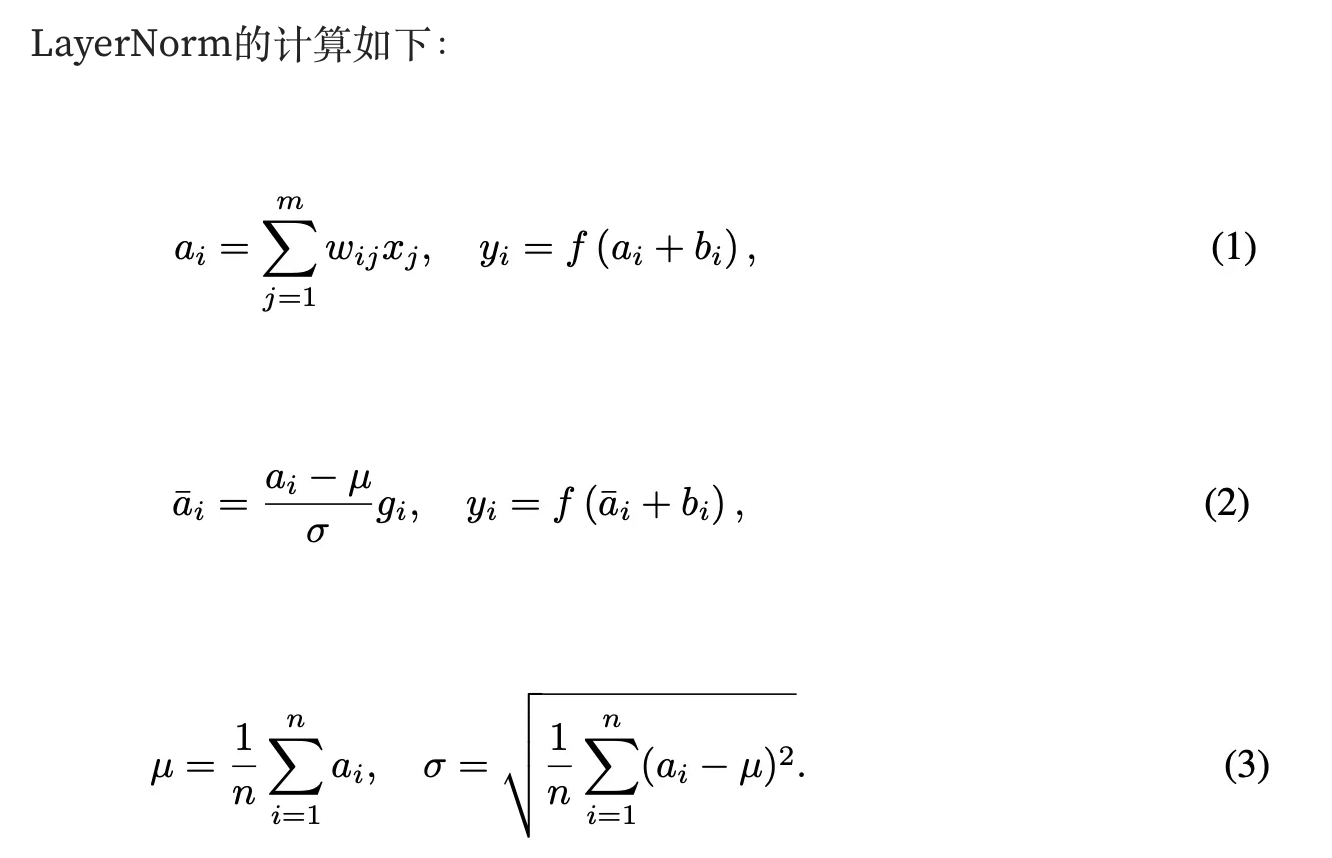

2、3为LayerNorm的计算方式, g为可学习参数

LayerNorm在特征维度进行归一化操作，使得均值为0，方差为1，LN对每一层的输出进行归一化，使得每一层输入分布保持相对稳定，稳定训练

BatchNorm是对每个特征在整个batch上进行归一化，LayerNorm是对每个样本的所有特征进行

transformer作为nlp任务处理可变长句子，BN在序列不一致情况下可能会有问题

transformer计算开销大难以做到大batch_size， 难以进行BatchNorm

In [17]:
class LayerNorm(nn.Module):
    def __init__(self, dim, eps=1e-6):
        super().__init__()
        # your code
        self.g = nn.Parameter(torch.ones(dim))
        self.b = nn.Parameter(torch.zeros(dim))
        self.eps = eps
        

    def forward(self, x):
        # your code
        mean = x.mean(-1, keepdim=True)
        std = x.std(-1, keepdim=True)
        
        out = ((x - mean) / std + self.eps) * self.g + self.b # add eps to avoid div zero
        return out

In [18]:
import torch
import torch.nn as nn


# 测试 LayerNorm
def test_layer_norm():
    dim = 512
    eps = 1e-6

    # 创建 LayerNorm 模型
    model = LayerNorm(dim, eps)

    # 随机输入数据
    batch_size = 32
    seq_len = 10
    x = torch.randn(batch_size, seq_len, dim)

    # 前向传播
    output = model(x)

    # 验证输出形状
    assert output.shape == x.shape, "Output shape is incorrect"

    # 验证均值接近 0，标准差接近 1
    mean = output.mean(-1)
    std = output.std(-1)
    assert torch.allclose(mean, torch.zeros_like(mean), atol=1e-5), "Mean is incorrect"
    assert torch.allclose(
        std, torch.ones_like(std), atol=1e-5
    ), "Standard deviation is incorrect"

    print("Test passed!")
    print("Output shape:", output.shape)


# 运行测试
test_layer_norm()

Test passed!
Output shape: torch.Size([32, 10, 512])


### RMSNorm

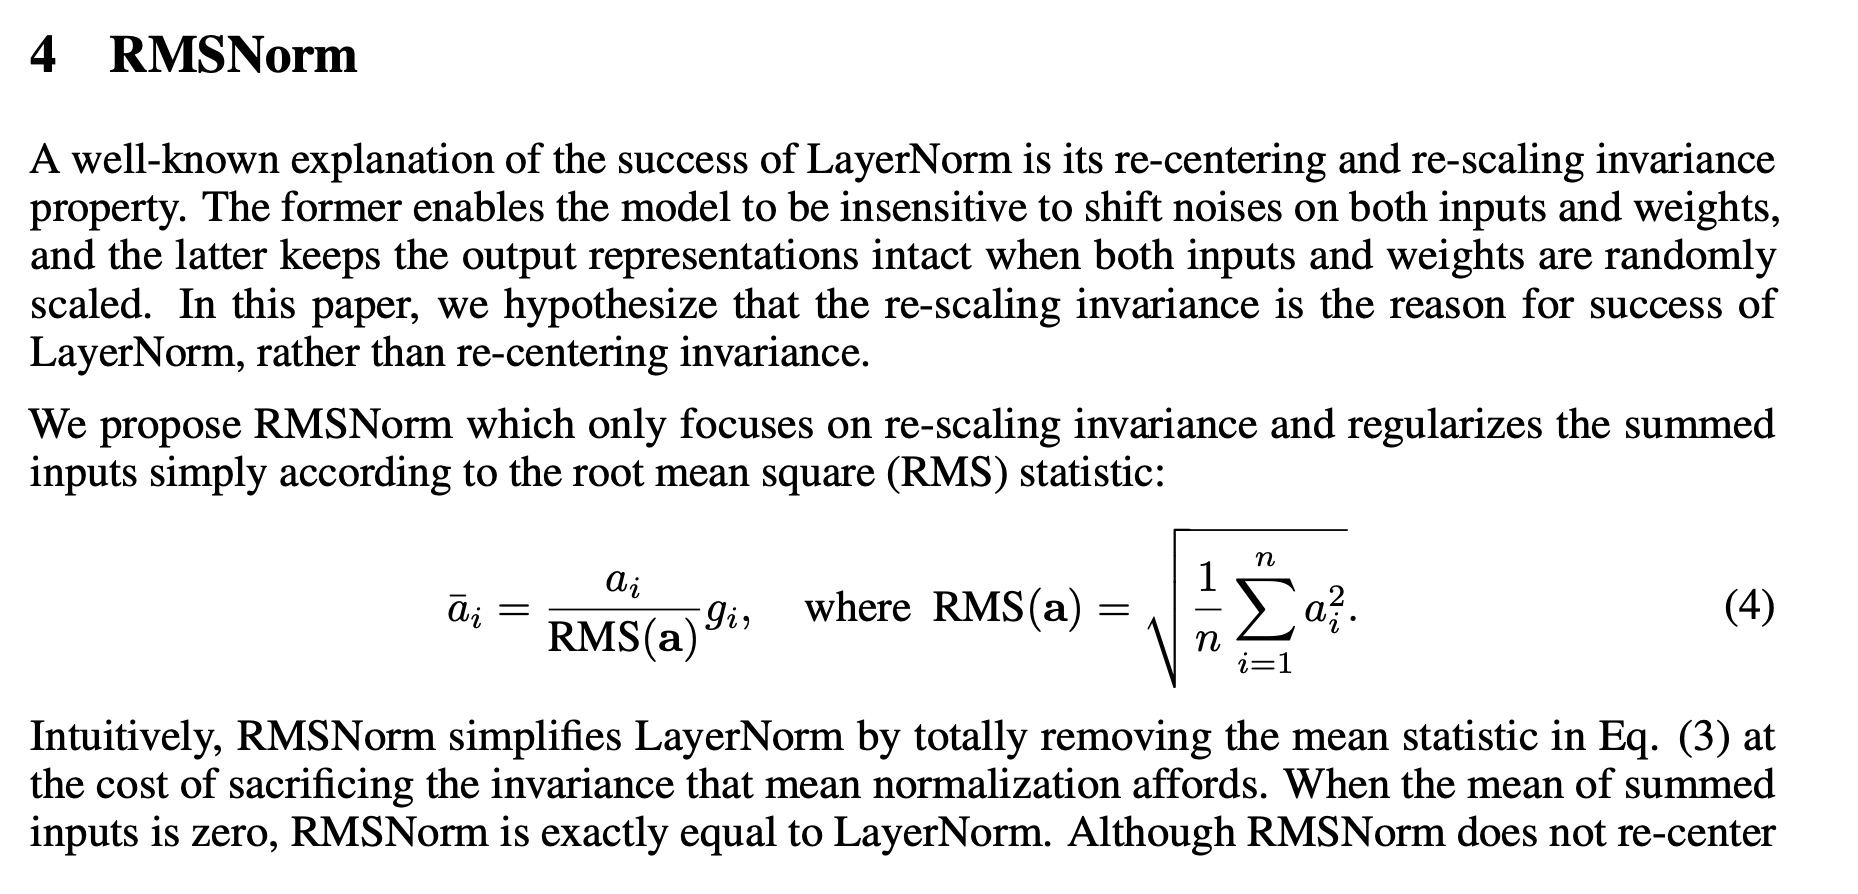

对于layerNorm和RMSNorm，layerNorm包含缩放和平移两部分，RMSNorm去除了平移部分，只保留了缩放部分

RMSNorm 相比一般的 layerNorm，减少了计算均值和平移系数的部分，训练速度更快，效果基本相当，甚至有所提升

In [19]:
# llama3 Source Code
class RMSNorm(torch.nn.Module):
    def __init__(self, dim: int, eps: float = 1e-6):
        super().__init__()
        self.eps = eps
        self.weight = nn.Parameter(torch.ones(dim))

    def _norm(self, x):
        return x * torch.rsqrt(x.pow(2).mean(-1, keepdim=True) + self.eps)

    def forward(self, x):
        output = self._norm(x.float()).type_as(x)
        return output * self.weight

In [20]:
class AddNorm(nn.Module):
    def __init__(self, dim, dropout=0.1):
        super().__init__()
        self.norm = LayerNorm(dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, sublayer_output):
        return self.norm(self.dropout(sublayer_output) + x)

In [21]:
import torch.nn as nn

class EncoderBlock(nn.Module):
    def __init__(self, dim, num_heads, dropout=0.1):
        super().__init__()
        self.addnorm1 = AddNorm(dim, dropout)
        self.addnorm2 = AddNorm(dim, dropout)
        self.attention = SimpleMultiHeadAttention(dim, num_heads)
        self.feed_forward = PositionwiseFeedForward(dim, 2 * dim)
    
    def forward(self, x, mask):
        y, _ = self.attention(x, x, x, mask)
        x = self.addnorm1(x, y)
        y = self.feed_forward(x)
        out = self.addnorm2(x, y)
        return out

In [22]:
class DecoderBlock(nn.Module):
    def __init__(self, dim, num_heads, dropout=0.1):
        super().__init__()
        self.addnorm1 = AddNorm(dim, dropout)
        self.addnorm2 = AddNorm(dim, dropout)
        self.addnorm3 = AddNorm(dim, dropout)
        self.attention1 = SimpleMultiHeadAttention(dim, num_heads)
        self.attention2 = SimpleMultiHeadAttention(dim, num_heads)
        self.feed_forward = PositionwiseFeedForward(dim, 2 * dim)
        
    def forward(self, x, enc_output, src_mask, trg_mask):
        y, _ = self.attention1(x, x, x, trg_mask)
        x = self.addnorm1(x, y)
        y, _ = self.attention2(enc_output, enc_output, x, src_mask)
        x = self.addnorm2(x, y)
        y = self.feed_forward(x)
        out = self.addnorm3(x, y)
        return out

In [23]:
class Encoder(nn.Module):
    def __init__(self, vocab_size, dim, num_layers, num_heads, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, dim)
        self.pos_encoding = PositionalEncoding(dim)
        self.layers = nn.ModuleList()
        for _ in range(num_layers):
            self.layers.append(EncoderBlock(dim, num_heads, dropout))
        self.norm = LayerNorm(dim)
        
    def forward(self, src, mask):
        x = self.embedding(src)
        x = self.pos_encoding(x)
        for layer in self.layers:
            x = layer(x, mask)
        out = self.norm(x)
        return out

In [24]:
class Decoder(nn.Module):
    def __init__(self, vocab_size, dim, num_layers, num_heads, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, dim)
        self.pos_encoding = PositionalEncoding(dim)
        self.layers = nn.ModuleList()
        for _ in range(num_layers):
            self.layers.append(DecoderBlock(dim, num_heads, dropout))
        self.norm = LayerNorm(dim)
            
    def forward(self, trg, enc_output, src_mask, trg_mask):
        x = self.embedding(trg)
        x = self.pos_encoding(x)
        for layer in self.layers:
            x = layer(x, enc_output, src_mask, trg_mask)
        out = self.norm(x)
        return out

In [25]:
from transformers import PretrainedConfig, PreTrainedModel
import torch.nn as nn

class TransformerConfig(PretrainedConfig):
    model_type = "custom_transformer"
    
    def __init__(self, src_vocab=100, trg_vocab=100, dim=1024, num_layers=2, num_heads=4, dropout=0.1, **kwargs):
        super().__init__(**kwargs)
        self.src_vocab = src_vocab
        self.trg_vocab = trg_vocab
        self.dim = dim
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.dropout = dropout

class Transformer(PreTrainedModel):
    config_class = TransformerConfig

    def __init__(self, config):
        super().__init__(config)
        self.encoder = Encoder(config.src_vocab, config.dim, config.num_layers, config.num_heads, config.dropout)
        self.decoder = Decoder(config.trg_vocab, config.dim, config.num_layers, config.num_heads, config.dropout)
        self.output = nn.Linear(config.dim, config.trg_vocab)

        self.init_weights()

    def forward(self, src, trg, src_mask, trg_mask, mode="train"):
        enc_output = self.encoder(src, src_mask)
        dec_output = self.decoder(trg, enc_output, src_mask, trg_mask)
        out = self.output(dec_output)
        
        if mode is "train":
            return {
                "loss": nn.CrossEntropyLoss()(out.view(-1, out.size(-1)), trg.view(-1)),
                "predictions": out.argmax(dim=-1),
            }
        return out

config = TransformerConfig()

model = Transformer(config)

<>:32: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:32: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
/var/folders/54/dqj88n2d345cnn8msy950gsm0000gn/T/ipykernel_33375/2018878462.py:32: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if mode is "train":


In [26]:
import torch
from transformers import PretrainedConfig, PreTrainedModel
from tqdm.notebook import tqdm

# Assuming the TransformerConfig and Transformer classes are already defined as in your code


def test_transformer():
    config = TransformerConfig()
    model = Transformer(config)

    # Create dummy input data
    batch_size = 2
    src_seq_len = 10
    trg_seq_len = 10

    src_input = torch.randint(0, config.src_vocab, (batch_size, src_seq_len))
    trg_input = torch.randint(0, config.trg_vocab, (batch_size, trg_seq_len))

    src_mask = torch.ones(batch_size, src_seq_len)
    trg_mask = torch.ones(batch_size, trg_seq_len)

    # Forward pass
    output = model(src_input, trg_input, src_mask, trg_mask, mode='pred')

    # Check output shape
    expected_output_shape = (batch_size, trg_seq_len, config.trg_vocab)
    assert (
        output.shape == expected_output_shape
    ), f"Output shape is incorrect: expected {expected_output_shape}, but got {output.shape}"

    print("Test passed! Output shape is correct.")


    print(output.shape)
test_transformer()

Test passed! Output shape is correct.
torch.Size([2, 10, 100])


In [27]:
from datasets import load_dataset

dataset = load_dataset('iwslt2017', 'iwslt2017-de-en')
dataset['train'] = dataset['train'].select(range(100))
dataset['validation'] = dataset['validation'].select(range(10))
dataset['test'] = dataset['test'].select(range(10))


def preprocess_function(examples):
    src_texts = [ex['de'] for ex in examples['translation']]
    trg_texts = [ex['en'] for ex in examples['translation']]
    
    # Tokenize src and trg texts
    src_encodings = tokenizer(src_texts, truncation=True, padding="max_length", max_length=128)
    trg_encodings = tokenizer(trg_texts, truncation=True, padding="max_length", max_length=128)
    
    # Create masks
    src_mask = [[1] * len(encodings) + [0] * (128 - len(encodings)) for encodings in src_encodings['input_ids']] # Iterate directly through the list of token IDs
    trg_mask = [[1] * len(encodings) + [0] * (128 - len(encodings)) for encodings in trg_encodings['input_ids']] # Iterate directly through the list of token IDs
    
    return {
        'src': src_encodings['input_ids'],
        'trg': trg_encodings['input_ids'],
        'src_mask': src_mask,
        'trg_mask': trg_mask
    }

# Tokenizer
from transformers import BartTokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
tokenized_datasets = dataset.map(preprocess_function, batched=True)

/Users/jademelody/Desktop/CS&DS-Learning/CS/ASC/AI/assignment02/.conda/lib/python3.12/site-packages/datasets/load.py:1486: FutureWarning: The repository for iwslt2017 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/iwslt2017
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
/Users/jademelody/Desktop/CS&DS-Learning/CS/ASC/AI/assignment02/.conda/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [28]:
from datasets import DatasetDict

dataset_dict = DatasetDict(
    {
        "train": tokenized_datasets["train"],
        "validation": tokenized_datasets["validation"],
        "test": tokenized_datasets["test"],
    }
)

# move the original text pair
dataset_dict = dataset_dict.remove_columns(["translation"])

print(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['src', 'trg', 'src_mask', 'trg_mask'],
        num_rows: 100
    })
    validation: Dataset({
        features: ['src', 'trg', 'src_mask', 'trg_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['src', 'trg', 'src_mask', 'trg_mask'],
        num_rows: 10
    })
})


In [29]:
print("Sample src:", tokenized_datasets["train"][0]["src"])
print("Sample trg:", tokenized_datasets["train"][0]["trg"])
print("Sample src_mask:", tokenized_datasets["train"][0]["src_mask"])
print("Sample trg_mask:", tokenized_datasets["train"][0]["trg_mask"])

Sample src: [0, 846, 5255, 225, 211, 3153, 6, 1573, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sample trg: [0, 13987, 47, 98, 203, 6, 1573, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sample src_mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [30]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=2,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=1,
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

trainer = Trainer(
    model=model,  
    args=training_args,
    train_dataset=dataset_dict["train"],
    eval_dataset=dataset_dict["validation"],
)

trainer.train()

  0%|          | 0/100 [00:00<?, ?it/s]

Could not estimate the number of tokens of the input, floating-point operations will not be computed


{'loss': 5.1812, 'grad_norm': 34.50065994262695, 'learning_rate': 1.0000000000000001e-07, 'epoch': 0.02}
{'loss': 5.3961, 'grad_norm': 36.788169860839844, 'learning_rate': 2.0000000000000002e-07, 'epoch': 0.04}
{'loss': 5.4753, 'grad_norm': 37.88957977294922, 'learning_rate': 3.0000000000000004e-07, 'epoch': 0.06}
{'loss': 5.2014, 'grad_norm': 34.73615646362305, 'learning_rate': 4.0000000000000003e-07, 'epoch': 0.08}
{'loss': 5.3688, 'grad_norm': 36.75685501098633, 'learning_rate': 5.000000000000001e-07, 'epoch': 0.1}
{'loss': 5.3581, 'grad_norm': 38.3752555847168, 'learning_rate': 6.000000000000001e-07, 'epoch': 0.12}
{'loss': 5.0514, 'grad_norm': 34.50215148925781, 'learning_rate': 7.000000000000001e-07, 'epoch': 0.14}
{'loss': 5.1961, 'grad_norm': 36.582069396972656, 'learning_rate': 8.000000000000001e-07, 'epoch': 0.16}
{'loss': 4.6956, 'grad_norm': 28.569765090942383, 'learning_rate': 9e-07, 'epoch': 0.18}
{'loss': 5.2755, 'grad_norm': 39.92228317260742, 'learning_rate': 1.0000000

TrainOutput(global_step=100, training_loss=1.7931174140423536, metrics={'train_runtime': 12.3707, 'train_samples_per_second': 16.167, 'train_steps_per_second': 8.084, 'total_flos': 0.0, 'train_loss': 1.7931174140423536, 'epoch': 2.0})

## Inference

### Beam Search

束搜索是介于穷举搜索和贪心搜索之间的做法，保留了较大的精度，也不会有过大的复杂度

- Beam Search从初始状态（开始标志`<sos>`）开始，通过模型生成多个可能的下一个token，选择概率最大的num_beams个，保留到下一个解码步骤中，重复步骤直到生成`<eos>`标志或者达到最大长度，选取整段句子每个token概率乘积最高的作为输出

- top_k抽样，从 tokens 里选择 k 个作为候选，然后根据它们的 likelihood scores 来采样模型从最可能的"k"个选项中随机选择一个

- top_p抽样，从 tokens 里选择 p 个作为候选，然后根据它们的 likelihood scores 来采样模型从最可能的"p"个选项中随机选择一个

- temperature是控制模型输出概率分布“平滑度”的参数。值越大（>1），输出的概率分布越平滑，生成的文本更多样化。值越小（<1），概率分布越陡峭，生成的文本更保守。通常， temperature 低会使生成过程更确定性，高则增加多样性。

$$
P(y_i) = \frac{\exp\left(\frac{\log P(y_i)}{\text{temperature}}\right)}{\sum_{j} \exp\left(\frac{\log P(y_j)}{\text{temperature}}\right)}
$$

In [ ]:
# llama3 source code
def sample_top_p(probs, p):
    """
    Perform top-p (nucleus) sampling on a probability distribution.

    Args:
        probs (torch.Tensor): Probability distribution tensor.
        p (float): Probability threshold for top-p sampling.

    Returns:
        torch.Tensor: Sampled token indices.

    Note:
        Top-p sampling selects the smallest set of tokens whose cumulative
        probability mass exceeds the threshold p. The distribution is renormalized
        based on the selected tokens.

    """
    # your code
    # Sort the probabilities and their corresponding indices
    probs_sort, probs_idx = torch.sort(probs, dim=-1, descending=True)
    # probs_sort: Sorted probabilities from the highest to the lowest.
    # probs_idx: The original indices of the sorted probabilities.

    # Compute the cumulative sum of the sorted probabilities
    probs_sum = torch.cumsum(probs_sort, dim=-1)
    # probs_sum is a tensor where each element is the cumulative sum of probabilities up to that point in the sorted list

    mask = probs_sum - probs_sort > p # a boolen tensor
    probs_sort[mask] = 0.0 # set all none selected token probs as 0

    # normalize the selected token probs to use torch.multinomial
    probs_sort.div_(probs_sort.sum(dim=-1, keepdim=True))

    # pick the token base on the probability
    next_token = torch.multinomial(probs_sort, num_samples=1)
    # Mapping the sampled index back to the original distribution and returning it
    next_token = torch.gather(probs_idx, -1, next_token)
    return next_token

In [ ]:
# logits是model生成的概率分布，其经过了softmax层，logits.shape == (bs, seqlen, vocab_size)
# logits = self.model.forward(tokens[:, prev_pos:cur_pos], prev_pos)
logits: torch.Tensor
temperature: int
probs: torch.Tensor
top_p: int
# llama3 source code
if temperature > 0: 
    # your code
    # logits[:, -1] pick the last step of logists
    probs = torch.softmax(logits[:, -1] / temperature, dim=-1) # probs: [bs, vocab_size]
    next_token = sample_top_p(probs, top_p)
    # 贪婪搜索
else: 
    # your code
    # pick the biggest in the probs as greedy search
    next_token = torch.argmax(logits[:, -1], dim=-1)